<a href="https://colab.research.google.com/github/Kaviya2727/kaviya/blob/main/handwritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data (0-255 to 0-1 range)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Build a simple deep neural network
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),        # Input layer: Flatten 28x28 images
    layers.Dense(128, activation='relu'),        # Hidden layer
    layers.Dropout(0.2),                         # Dropout to prevent overfitting
    layers.Dense(10, activation='softmax')       # Output layer: 10 classes (digits 0–9)
])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [2]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest Accuracy: {test_acc:.4f}')

# Predict and visualize some test images
predictions = model.predict(x_test)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8577 - loss: 0.4836
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9545 - loss: 0.1543
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9671 - loss: 0.1075
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9733 - loss: 0.0861
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9770 - loss: 0.0733
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9715 - loss: 0.0922

Test Accuracy: 0.9757
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


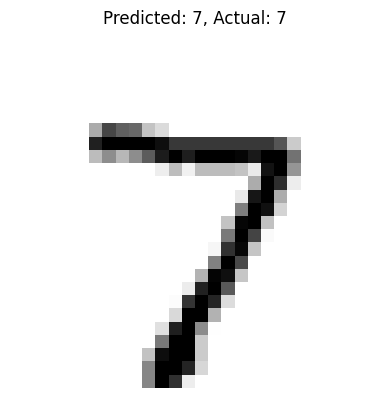

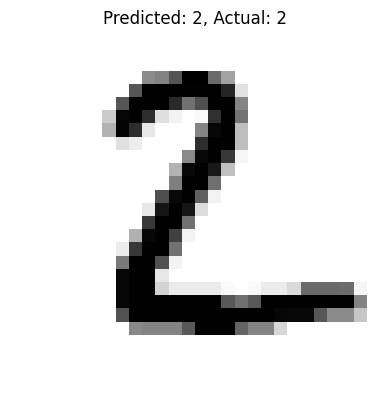

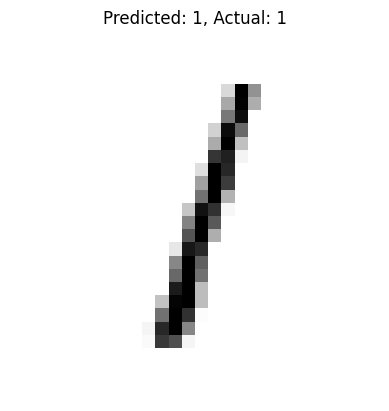

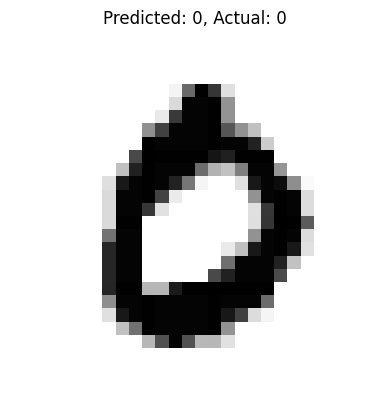

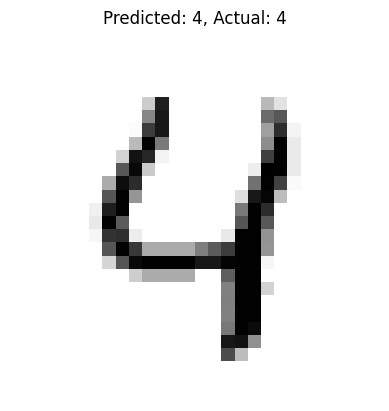

In [3]:
# Display the first 5 test images with predictions
for i in range(5):
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.title(f"Predicted: {tf.argmax(predictions[i]).numpy()}, Actual: {y_test[i]}")
    plt.axis('off')
    plt.show()